In [34]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split

In [35]:
d=pd.read_csv('Parkinsson disease.csv')
d

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [36]:
d.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [3]:
df=d.copy()

In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [5]:
e=d.head(20)

In [6]:
f=d.head()

<AxesSubplot:xlabel='name', ylabel='Shimmer:DDA'>

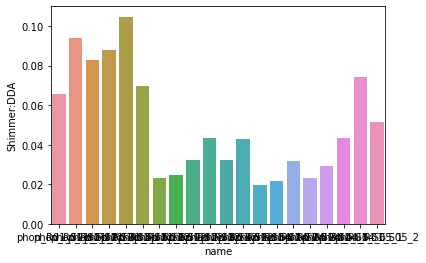

In [37]:
sns.barplot(data=e,x='name',y='Shimmer:DDA')

<AxesSubplot:xlabel='name', ylabel='Jitter:DDP'>

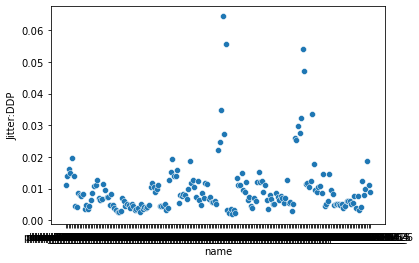

In [38]:
sns.scatterplot(data=d,x='name',y='Jitter:DDP')

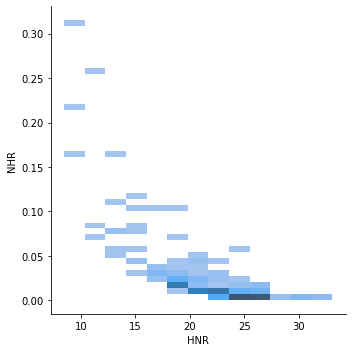

In [9]:
sns.displot(data=d,x="HNR",y='NHR')

In [ ]:
#plt.pie(data=d, x='MDVP:Fhi(Hz)')

<AxesSubplot:ylabel='Count'>

C:\Users\lenovo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


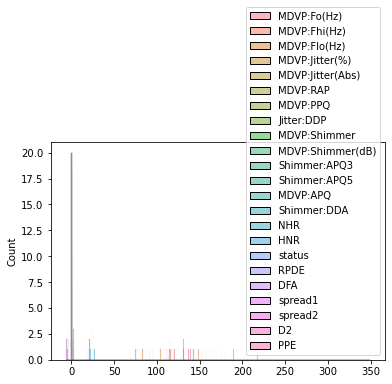

In [11]:
sns.histplot(data=e)

In [12]:
to_drop=['name']

In [13]:
df.drop(to_drop, inplace=True, axis=1)


In [14]:
x=df[['MDVP:Flo(Hz)','MDVP:Fo(Hz)']]
y=df['MDVP:Shimmer']

In [15]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3)

In [17]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr

LogisticRegression()

In [18]:
from sklearn.linear_model import LinearRegression
clf=LinearRegression()
clf

LinearRegression()

In [19]:
clf.fit(x_train,y_train)

LinearRegression()

In [20]:
clf.predict(x_test)

array([0.13335362, 0.16850551, 0.30120812, 0.2586129 , 0.32647212,
       0.1847699 , 0.32035082, 0.14942228, 0.21253686, 0.306267  ,
       0.15445388, 0.194176  , 0.21007265, 0.03558584, 0.22320488,
       0.20642173, 0.15099283, 0.20145264, 0.10662275, 0.31824992,
       0.09909148, 0.34455624, 0.32964103, 0.24248909, 0.14739462,
       0.35895143, 0.21014278, 0.12662261, 0.3607832 , 0.18274333,
       0.23171344, 0.21499482, 0.1174418 , 0.25459477, 0.1671757 ,
       0.14480141, 0.38419018, 0.16829612, 0.4870666 , 0.23044855,
       0.09230134, 0.18118942, 0.17181233, 0.21549669, 0.21968546,
       0.24522658, 0.05752988, 0.30390771, 0.41209325, 0.09061737,
       0.21897594, 0.23940426, 0.10956326, 0.10465542, 0.24708933,
       0.19397147, 0.25536778, 0.1053757 , 0.14374406])

In [21]:
clf.score(x_test,y_test)

0.9549609629043933

In [22]:
clf.coef_

array([ 3.95126758e-04,  1.74864131e-05, -8.46583474e-05, -9.03099943e+00,
        1.21012590e+03, -9.10806003e+02,  3.10494308e+01,  2.96345367e+02,
        2.04085333e+00, -1.60772552e-01, -3.65249541e+02, -2.61020008e+00,
        1.39711593e+00,  1.21607394e+02,  1.26400162e-01, -1.44503131e-03,
        5.37556514e-03, -5.30247250e-03,  1.37283100e-01,  5.82044238e-02,
        5.17846973e-03,  1.13675524e-02])

In [23]:
clf.intercept_

0.35528765767917614

In [26]:
clf.predict([[333.3,421.5,222.3,333.445,2344.555,456.456,7899.94,222.344,123.321,345.345,224.567,
             333.3,421.5,222.3,333.445,2344.555,456.456,7899.94,222.344,123.321,345.345,224.567]])

array([2674599.02095178])